In [1]:
# Importing packages
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import os
import datetime 
import time

In [2]:
dataFile = pd.read_csv('test_data_final.csv')

In [3]:
dataFile

,Unnamed: 0,event_timestamp,event_date,country,user_pseudo_id,event_name
0,0,1665273599626000,20221008,B,user_0,register_mobile
1,1,1665273599626000,20221008,B,user_0,register_mobile
2,2,1665273599556012,20221008,B,user_0,event1
3,3,1665273599556012,20221008,B,user_0,event1
4,4,1665273575218002,20221008,B,user_1,event2
...,...,...,...,...,...,...
780091,780091,1664553610197004,20221001,A,user_1202,event12
780092,780092,1664553610054000,20221001,A,user_1202,event13
780093,780093,1664553609839000,20221001,A,user_1531,register_mobile
780094,780094,1664553609727003,20221001,A,user_1531,event1


In [4]:
# Question 1: 
# Calculate the day 1 (the next day) retention rates for each user, who trigger either register_mobile  or register_email in day 0 and  the appearance rate (whether any time the user returns or not after day 0). 
# Define day 0 as the date when register_mobile  or register_email was triggered for the first time.
# Note: The date of Day 1 varies for each user. For example, if User_X appeared on October 4, 2022 for the first time, the subsequent day, referred to as "Day 1," would be October 5,2022. 

In [5]:
dataFile['event_date'] = pd.to_datetime(dataFile['event_date'].astype(str), format='%Y%m%d')

In [6]:
dataFile

,Unnamed: 0,event_timestamp,event_date,country,user_pseudo_id,event_name
0,0,1665273599626000,2022-10-08,B,user_0,register_mobile
1,1,1665273599626000,2022-10-08,B,user_0,register_mobile
2,2,1665273599556012,2022-10-08,B,user_0,event1
3,3,1665273599556012,2022-10-08,B,user_0,event1
4,4,1665273575218002,2022-10-08,B,user_1,event2
...,...,...,...,...,...,...
780091,780091,1664553610197004,2022-10-01,A,user_1202,event12
780092,780092,1664553610054000,2022-10-01,A,user_1202,event13
780093,780093,1664553609839000,2022-10-01,A,user_1531,register_mobile
780094,780094,1664553609727003,2022-10-01,A,user_1531,event1


In [7]:
# Filter for registration events
registration_events = dataFile[dataFile['event_name'].isin(['register_mobile', 'register_email'])]

# Get the first registration date for each user (Day 0)
day_0 = registration_events.groupby('user_pseudo_id')['event_date'].min().reset_index()
day_0.columns = ['user_pseudo_id', 'day_0']

# Merge day_0 back to the original dataframe
dataFile = dataFile.merge(day_0, on='user_pseudo_id', how='left')

In [8]:
dataFile

,Unnamed: 0,event_timestamp,event_date,country,user_pseudo_id,event_name,day_0
0,0,1665273599626000,2022-10-08,B,user_0,register_mobile,2022-10-08
1,1,1665273599626000,2022-10-08,B,user_0,register_mobile,2022-10-08
2,2,1665273599556012,2022-10-08,B,user_0,event1,2022-10-08
3,3,1665273599556012,2022-10-08,B,user_0,event1,2022-10-08
4,4,1665273575218002,2022-10-08,B,user_1,event2,2022-10-01
...,...,...,...,...,...,...,...
780091,780091,1664553610197004,2022-10-01,A,user_1202,event12,NaT
780092,780092,1664553610054000,2022-10-01,A,user_1202,event13,NaT
780093,780093,1664553609839000,2022-10-01,A,user_1531,register_mobile,2022-10-01
780094,780094,1664553609727003,2022-10-01,A,user_1531,event1,2022-10-01


In [9]:
# Calculate Day 1 for each user
dataFile['day_1'] = dataFile['day_0'] + pd.Timedelta(days=1)

# Filter events that occur on Day 1
day_1_events = dataFile[dataFile['event_date'] == dataFile['day_1']]

# Calculate Day 1 retention (1 if user has event on Day 1, otherwise 0)
day_1_retention = day_1_events.groupby('user_pseudo_id').size().reset_index(name='retained')
day_1_retention['retained'] = 1  # Set retained to 1 for users with events on Day 1

# Merge retention info back with day_0 to get all users
retention_df = day_0.merge(day_1_retention, on='user_pseudo_id', how='left')
retention_df['retained'] = retention_df['retained'].fillna(0).astype(int)

In [10]:
dataFile

,Unnamed: 0,event_timestamp,event_date,country,user_pseudo_id,event_name,day_0,day_1
0,0,1665273599626000,2022-10-08,B,user_0,register_mobile,2022-10-08,2022-10-09
1,1,1665273599626000,2022-10-08,B,user_0,register_mobile,2022-10-08,2022-10-09
2,2,1665273599556012,2022-10-08,B,user_0,event1,2022-10-08,2022-10-09
3,3,1665273599556012,2022-10-08,B,user_0,event1,2022-10-08,2022-10-09
4,4,1665273575218002,2022-10-08,B,user_1,event2,2022-10-01,2022-10-02
...,...,...,...,...,...,...,...,...
780091,780091,1664553610197004,2022-10-01,A,user_1202,event12,NaT,NaT
780092,780092,1664553610054000,2022-10-01,A,user_1202,event13,NaT,NaT
780093,780093,1664553609839000,2022-10-01,A,user_1531,register_mobile,2022-10-01,2022-10-02
780094,780094,1664553609727003,2022-10-01,A,user_1531,event1,2022-10-01,2022-10-02


In [11]:
# Determine if the user appears any time after day_0
appearance_events = dataFile[dataFile['event_date'] > dataFile['day_0']]

# Calculate appearance rate (1 if user has event after Day 0, otherwise 0)
appearance_rate = appearance_events.groupby('user_pseudo_id').size().reset_index(name='appeared')
appearance_rate['appeared'] = 1  # Set appeared to 1 for users with events after Day 0

# Merge appearance info back with day_0 to get all users
appearance_df = day_0.merge(appearance_rate, on='user_pseudo_id', how='left')
appearance_df['appeared'] = appearance_df['appeared'].fillna(0).astype(int)

In [12]:
final_df = retention_df.merge(appearance_df[['user_pseudo_id', 'appeared']], on='user_pseudo_id', how='left')

In [13]:
final_df

,user_pseudo_id,day_0,retained,appeared
0,user_0,2022-10-08,0,0
1,user_1,2022-10-01,0,1
2,user_100,2022-10-06,1,1
3,user_10002,2022-10-02,0,0
4,user_10003,2022-10-02,0,0
...,...,...,...,...
7085,user_9993,2022-10-02,0,0
7086,user_9994,2022-10-02,0,0
7087,user_9997,2022-10-02,0,0
7088,user_9998,2022-10-02,0,0


In [14]:
# Question 2:
# Users who engage with specific events within a defined time frame are more likely to have longer retention rates. 
# Therefore, analyse the dataset to identify key events triggered within the first 5 minutes after first_open is used. 
# Determine which of these events have the most significant impact on next-day retention rates.

In [15]:
# Ensure that the timestamps are in datetime format
dataFile['day_0'] = pd.to_datetime(dataFile['day_0'])
dataFile['event_timestamp'] = pd.to_datetime(dataFile['event_timestamp'])

# Calculate the time difference between the event and the first open
dataFile['time_since_first_open'] = (dataFile['event_timestamp'] - dataFile['day_0']).dt.total_seconds()

# Filter events that occurred within the first 5 minutes (300 seconds)
dataFile_first_5_minutes = dataFile[dataFile['time_since_first_open'] <= 300]

# Calculate next-day retention rates for users who triggered each event within the first 5 minutes
event_retention_rates = dataFile_first_5_minutes.groupby('event_name')['day_1'].mean().reset_index()

# Sort events by retention rate in descending order
event_retention_rates = event_retention_rates.sort_values(by='day_1', ascending=False)

# Print the events and their next-day retention rates
print(event_retention_rates)

   event_name                         day_1
87    event91 2022-10-07 12:00:00.000000000
88    event92 2022-10-07 00:00:00.000000000
86    event90 2022-10-06 14:32:48.642447360
81    event85 2022-10-06 08:00:00.000000000
80    event84 2022-10-05 19:34:44.210526208
..        ...                           ...
11     event2 2022-10-03 03:48:11.803278592
90    event95 2022-10-03 00:00:00.000000000
91    event96 2022-10-02 12:00:00.000000000
77    event81 2022-10-02 00:00:00.000000000
92    event97 2022-10-02 00:00:00.000000000

[96 rows x 2 columns]


In [16]:
# Question 3
# Extract any other insights from the dataset that you believe may be valuable. Visualize these insights as appropriate.

In [17]:
dataFile

,Unnamed: 0,event_timestamp,event_date,country,user_pseudo_id,event_name,day_0,day_1,time_since_first_open
0,0,1970-01-20 06:34:33.599626000,2022-10-08,B,user_0,register_mobile,2022-10-08,2022-10-09,-1.663522e+09
1,1,1970-01-20 06:34:33.599626000,2022-10-08,B,user_0,register_mobile,2022-10-08,2022-10-09,-1.663522e+09
2,2,1970-01-20 06:34:33.599556012,2022-10-08,B,user_0,event1,2022-10-08,2022-10-09,-1.663522e+09
3,3,1970-01-20 06:34:33.599556012,2022-10-08,B,user_0,event1,2022-10-08,2022-10-09,-1.663522e+09
4,4,1970-01-20 06:34:33.575218002,2022-10-08,B,user_1,event2,2022-10-01,2022-10-02,-1.662917e+09
...,...,...,...,...,...,...,...,...,...
780091,780091,1970-01-20 06:22:33.610197004,2022-10-01,A,user_1202,event12,NaT,NaT,NaN
780092,780092,1970-01-20 06:22:33.610054000,2022-10-01,A,user_1202,event13,NaT,NaT,NaN
780093,780093,1970-01-20 06:22:33.609839000,2022-10-01,A,user_1531,register_mobile,2022-10-01,2022-10-02,-1.662918e+09
780094,780094,1970-01-20 06:22:33.609727003,2022-10-01,A,user_1531,event1,2022-10-01,2022-10-02,-1.662918e+09


<Axes: xlabel='event_name', ylabel='count'>

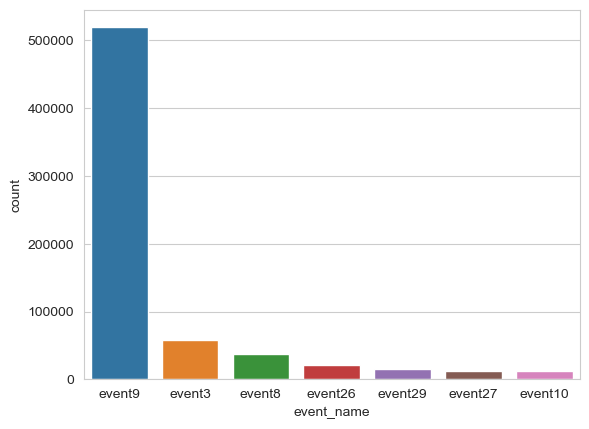

In [24]:
# Looking at the top 7 popular events by count
sns.countplot(data=dataFile, x='event_name', order=dataFile.event_name.value_counts().iloc[:7].index)

<Axes: xlabel='event_name', ylabel='count'>

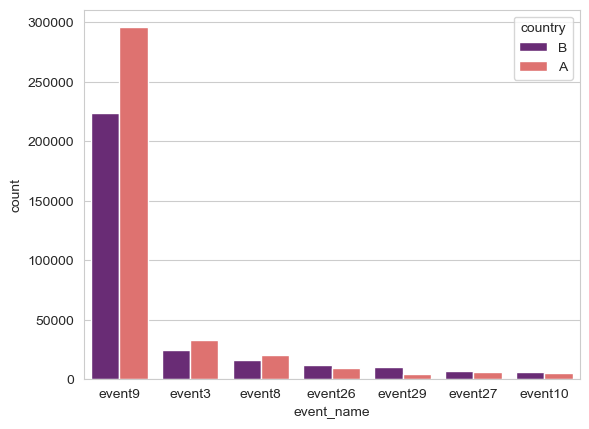

In [43]:
# Top 7 events ranked using count by country
sns.countplot(data=dataFile, x='event_name', hue='country', palette=("magma"),
              order=dataFile.event_name.value_counts().iloc[:7].index)

In [58]:
print(dataFile[dataFile.event_name == 'register_mobile'].shape[0])

6316


In [59]:
print(dataFile[dataFile.event_name == 'register_email'].shape[0])

796


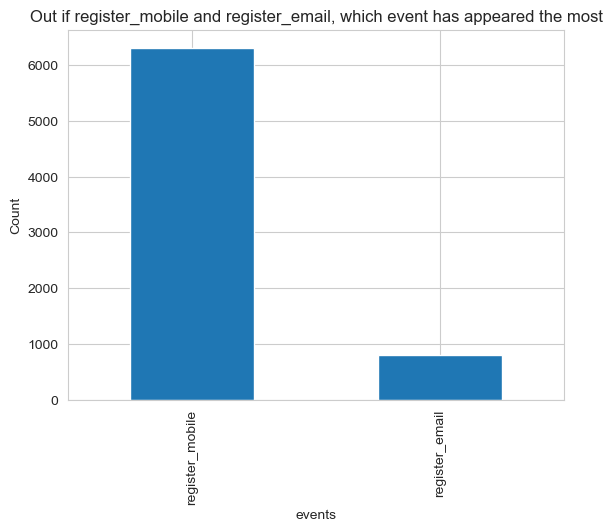

In [72]:
# Which event out of register mobile and register email appeared the most 
specific_event = dataFile['event_name'].value_counts().loc[['register_mobile', 'register_email']]

specific_event.plot(kind='bar')
plt.xlabel('events')
plt.ylabel('Count')
plt.title('Out if register_mobile and register_email, which event has appeared the most')
plt.show()